# News Mood Analysis
*As of 8/4/18 - 22:00 hrs, CBS has the highest average compound score (0.22), followed by BBC (0.16)

*The New York Times has the lowest average compound score (-0.05).

*CNN and Fox News have an average compound score very close to zero (-0.01)

In [72]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config_twitter import (consumer_key, consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [73]:
# Target User Accounts
target_user = ("@nytimes", "@CNN", "@FoxNews", "@CBS", "@BBC")

# List for dictionaries of results
results_list = []

# Create variable for holding the oldest tweet
oldest_tweet = None

# List to hold unique IDs
unique_ids = []

# Counter to keep track of the number of tweets retrieved
counter = 0

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Variables for user, text and tweet id
    user_list = []
    tweet_text_list = []
    tweet_id_list = []
    
    # Create array to record all date-times of tweets
    tweet_times = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Store user and tweet text
            tweet_user = tweet["user"]["screen_name"]
            user_list.append(tweet_user)
            
            tweet_text = tweet["text"]
            tweet_text_list.append(tweet_text)
             
            # Store all tweet times into the array
            tweet_date = tweet["created_at"]
            tweet_times.append(tweet["created_at"])
            
            # Append tweet_id to ids list if it doesn't already exist
            # This allows checking for duplicate tweets
            tweet_id = tweet["id"]
            tweet_id_list.append(tweet_id)
        
            if tweet_id not in unique_ids:
                unique_ids.append(tweet_id)
       
            # Reassign the the oldest tweet (i.e. the max_id)
            # Subtract 1 so the previous oldest isn't included
            # in the new search
        
            oldest_tweet = tweet_id - 1
        
            # Increase counter by 1
            counter += 1      
            
    # Create a dictionaty of results
    user_results = {"Username": user_list,
                    "Compound Score": compound_list,
                    "Positive Score": positive_list,
                    "Neutral Score": neutral_list,
                    "Negative Score": negative_list,
                    "Tweet Text": tweet_text_list,
                    "Tweet ID": tweet_id_list,
                    "Date": tweet_times}
    
    # Append dictionary to list
    results_list.append(user_results)
    
    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.2f}")
    print(f"Positive: {np.mean(positive_list):.2f}")
    print(f"Neutral: {np.mean(neutral_list):.2f}")
    print(f"Negative: {np.mean(negative_list):.2f}")
    print()
    

User: @nytimes
Compound: -0.05
Positive: 0.06
Neutral: 0.86
Negative: 0.08

User: @CNN
Compound: -0.01
Positive: 0.06
Neutral: 0.87
Negative: 0.07

User: @FoxNews
Compound: -0.01
Positive: 0.08
Neutral: 0.84
Negative: 0.08

User: @CBS
Compound: 0.22
Positive: 0.12
Neutral: 0.86
Negative: 0.02

User: @BBC
Compound: 0.16
Positive: 0.11
Neutral: 0.85
Negative: 0.04



In [74]:
# Print the number of unique ids retrieved
print(len(unique_ids))

500


In [75]:
# Create DataFrame from Results List
for i, x in enumerate(results_list):
    news_pd = pd.DataFrame(x)
    if i == 0:
        all_pd = news_pd.copy()
    else:
        all_pd = all_pd.append(news_pd,ignore_index=True)
  
all_pd

,Username,Compound Score,Positive Score,Neutral Score,Negative Score,Tweet Text,Tweet ID,Date
0,nytimes,-0.3818,0.000,0.880,0.120,In the battle to desegregate American public s...,1025924649098592256,Sun Aug 05 02:01:11 +0000 2018
1,nytimes,0.0000,0.000,1.000,0.000,"At least twice in ancient history, humans have...",1025924624532549632,Sun Aug 05 02:01:05 +0000 2018
2,nytimes,-0.2500,0.000,0.857,0.143,Experts warn that the seemingly endless stream...,1025920080008409088,Sun Aug 05 01:43:02 +0000 2018
3,nytimes,-0.3818,0.000,0.714,0.286,Cuomo Moves to Scrap N.R.A. Lawsuit Accusing H...,1025911056517005313,Sun Aug 05 01:07:11 +0000 2018
4,nytimes,-0.4019,0.084,0.728,0.188,Adults should be alert to telltale signs of ea...,1025907935615090694,Sun Aug 05 00:54:46 +0000 2018
5,nytimes,0.0258,0.091,0.909,0.000,"Wines of The Times: Beyond Assyrtiko, Greek Wh...",1025903182352994304,Sun Aug 05 00:35:53 +0000 2018
6,nytimes,-0.5256,0.000,0.855,0.145,Tom Cruise insists on doing his own stunts in ...,1025900220507402240,Sun Aug 05 00:24:07 +0000 2018
7,nytimes,-0.4767,0.000,0.721,0.279,Venezuelan President Targeted in Attack Attemp...,1025895713052545024,Sun Aug 05 00:06:12 +0000 2018
8,nytimes,0.2500,0.222,0.778,0.000,"Alright, stick with us here but… aliens https:...",1025895436165570560,Sun Aug 05 00:05:06 +0000 2018
9,nytimes,-0.4767,0.000,0.829,0.171,Venezuela's president was the target of an att...,1025894995465842694,Sun Aug 05 00:03:21 +0000 2018


In [76]:
News_outlets_df = all_pd.rename(columns={"Username": "Media Sources"})
News_outlets_df["Media Sources"].replace(to_replace=["nytimes"], value="New York Times", inplace=True)
News_outlets_df["Media Sources"].replace(to_replace=["FoxNews"], value="Fox News", inplace=True)
News_outlets_df

,Media Sources,Compound Score,Positive Score,Neutral Score,Negative Score,Tweet Text,Tweet ID,Date
0,New York Times,-0.3818,0.000,0.880,0.120,In the battle to desegregate American public s...,1025924649098592256,Sun Aug 05 02:01:11 +0000 2018
1,New York Times,0.0000,0.000,1.000,0.000,"At least twice in ancient history, humans have...",1025924624532549632,Sun Aug 05 02:01:05 +0000 2018
2,New York Times,-0.2500,0.000,0.857,0.143,Experts warn that the seemingly endless stream...,1025920080008409088,Sun Aug 05 01:43:02 +0000 2018
3,New York Times,-0.3818,0.000,0.714,0.286,Cuomo Moves to Scrap N.R.A. Lawsuit Accusing H...,1025911056517005313,Sun Aug 05 01:07:11 +0000 2018
4,New York Times,-0.4019,0.084,0.728,0.188,Adults should be alert to telltale signs of ea...,1025907935615090694,Sun Aug 05 00:54:46 +0000 2018
5,New York Times,0.0258,0.091,0.909,0.000,"Wines of The Times: Beyond Assyrtiko, Greek Wh...",1025903182352994304,Sun Aug 05 00:35:53 +0000 2018
6,New York Times,-0.5256,0.000,0.855,0.145,Tom Cruise insists on doing his own stunts in ...,1025900220507402240,Sun Aug 05 00:24:07 +0000 2018
7,New York Times,-0.4767,0.000,0.721,0.279,Venezuelan President Targeted in Attack Attemp...,1025895713052545024,Sun Aug 05 00:06:12 +0000 2018
8,New York Times,0.2500,0.222,0.778,0.000,"Alright, stick with us here but… aliens https:...",1025895436165570560,Sun Aug 05 00:05:06 +0000 2018
9,New York Times,-0.4767,0.000,0.829,0.171,Venezuela's president was the target of an att...,1025894995465842694,Sun Aug 05 00:03:21 +0000 2018


In [77]:
News_outlets_df['Date'] = pd.to_datetime(News_outlets_df['Date'])

In [78]:
News_outlets_df.dtypes

Media Sources             object
Compound Score           float64
Positive Score           float64
Neutral Score            float64
Negative Score           float64
Tweet Text                object
Tweet ID                   int64
Date              datetime64[ns]
dtype: object

In [79]:
News_outlets_df.head()

,Media Sources,Compound Score,Positive Score,Neutral Score,Negative Score,Tweet Text,Tweet ID,Date
0,New York Times,-0.3818,0.000,0.880,0.120,In the battle to desegregate American public s...,1025924649098592256,2018-08-05 02:01:11
1,New York Times,0.0000,0.000,1.000,0.000,"At least twice in ancient history, humans have...",1025924624532549632,2018-08-05 02:01:05
2,New York Times,-0.2500,0.000,0.857,0.143,Experts warn that the seemingly endless stream...,1025920080008409088,2018-08-05 01:43:02
3,New York Times,-0.3818,0.000,0.714,0.286,Cuomo Moves to Scrap N.R.A. Lawsuit Accusing H...,1025911056517005313,2018-08-05 01:07:11
4,New York Times,-0.4019,0.084,0.728,0.188,Adults should be alert to telltale signs of ea...,1025907935615090694,2018-08-05 00:54:46


In [80]:
News_outlets_df = News_outlets_df.sort_values(by=["Media Sources", "Date"], ascending=False)

News_outlets_df['Time_diff'] = News_outlets_df.groupby('Media Sources')['Date'].diff().astype('timedelta64[s]')*-1
News_outlets_df["Time_diff"].fillna(0, inplace=True)
News_outlets_df['Time_diff'] = News_outlets_df['Time_diff']/3600

News_outlets_df["Tweets Ago"] = News_outlets_df.groupby('Media Sources').cumcount()+1
News_outlets_df.set_index("Media Sources", inplace=True)
News_outlets_df.head()

,Compound Score,Positive Score,Neutral Score,Negative Score,Tweet Text,Tweet ID,Date,Time_diff,Tweets Ago
Media Sources,,,,,,,,,
New York Times,-0.3818,0.000,0.880,0.120,In the battle to desegregate American public s...,1025924649098592256,2018-08-05 02:01:11,0.000000,1
New York Times,0.0000,0.000,1.000,0.000,"At least twice in ancient history, humans have...",1025924624532549632,2018-08-05 02:01:05,0.001667,2
New York Times,-0.2500,0.000,0.857,0.143,Experts warn that the seemingly endless stream...,1025920080008409088,2018-08-05 01:43:02,0.300833,3
New York Times,-0.3818,0.000,0.714,0.286,Cuomo Moves to Scrap N.R.A. Lawsuit Accusing H...,1025911056517005313,2018-08-05 01:07:11,0.597500,4
New York Times,-0.4019,0.084,0.728,0.188,Adults should be alert to telltale signs of ea...,1025907935615090694,2018-08-05 00:54:46,0.206944,5


In [81]:
News_outlets_df.to_csv("News_Mood_Sentiment_Analysis.csv")

# Sentiment Analysis of Media Tweets

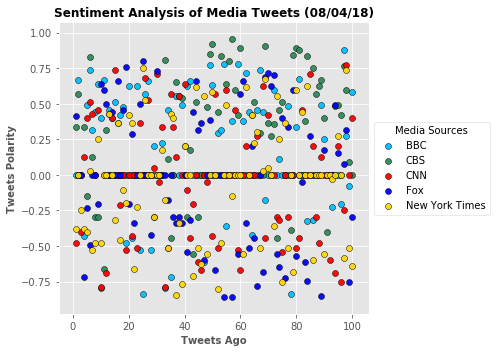

In [82]:
# Scatter plot of sentiments of the last 100 tweets sent out by each news organization.

BBC_Tweets_ago = News_outlets_df.loc[["BBC"],["Tweets Ago"]]
BBC_Tweets_polarity = News_outlets_df.loc[["BBC"],["Compound Score"]]

CBS_Tweets_ago = News_outlets_df.loc[["CBS"],["Tweets Ago"]]
CBS_Tweets_polarity = News_outlets_df.loc[["CBS"],["Compound Score"]]

CNN_Tweets_ago = News_outlets_df.loc[["CNN"],["Tweets Ago"]]
CNN_Tweets_polarity = News_outlets_df.loc[["CNN"],["Compound Score"]]

FOX_Tweets_ago = News_outlets_df.loc[["Fox News"],["Tweets Ago"]]
FOX_Tweets_polarity = News_outlets_df.loc[["Fox News"],["Compound Score"]]

NYT_Tweets_ago = News_outlets_df.loc[["New York Times"],["Tweets Ago"]]
NYT_Tweets_polarity = News_outlets_df.loc[["New York Times"],["Compound Score"]]

plt.scatter(BBC_Tweets_ago, BBC_Tweets_polarity, marker="o", facecolors="deepskyblue", edgecolors="black", alpha=0.95, label="BBC")
plt.scatter(CBS_Tweets_ago, CBS_Tweets_polarity, marker="o", facecolors="seagreen", edgecolors="black", alpha=0.95, label="CBS")
plt.scatter(CNN_Tweets_ago, CNN_Tweets_polarity, marker="o", facecolors="red", edgecolors="black", alpha=0.95, label="CNN")
plt.scatter(FOX_Tweets_ago, FOX_Tweets_polarity, marker="o", facecolors="blue", edgecolors="black", alpha=0.95, label="Fox")
plt.scatter(NYT_Tweets_ago, NYT_Tweets_polarity, marker="o", facecolors="gold", edgecolors="black", alpha=0.95, label="New York Times")


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})", size="large", fontweight='bold')
plt.xlabel("Tweets Ago", size="medium", fontweight='bold')
plt.ylabel("Tweets Polarity", size="medium", fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(7,5) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor="white", title="Media Sources")

# Save Figure
plt.tight_layout()
plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()

In [83]:
Average_compound_sentiment_df = News_outlets_df.groupby(["Media Sources"]).mean()["Compound Score"]
Average_compound_sentiment_df = pd.DataFrame(Average_compound_sentiment_df)
Average_compound_sentiment_df

,Compound Score
Media Sources,
BBC,0.164110
CBS,0.224865
CNN,-0.010773
Fox News,-0.013742
New York Times,-0.051716


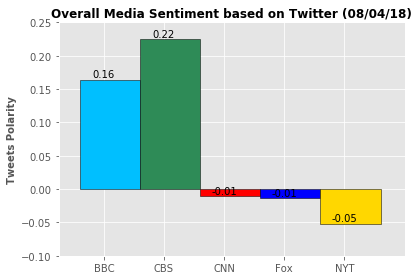

In [84]:
# Create a bar chart
News_outlets = ["BBC", "CBS", "CNN", "Fox", "NYT"]                           
x_axis = np.arange(len(Average_compound_sentiment_df))
Average_compound_sentiment = Average_compound_sentiment_df["Compound Score"]

bar1 = plt.bar(x_axis, Average_compound_sentiment, color=["deepskyblue", "seagreen", "red", "blue", "gold"], label="News_outlets", \
        align="center", edgecolor="black")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, News_outlets)

# Add counts above the bar graphs
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, '%.2f' % (height), ha='center', va='bottom')

for rect in bar1:
              plt.setp(rect, width=1)
    
# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter ({now})", size="large", fontweight='bold')
plt.ylabel("Tweets Polarity", size="medium", fontweight='bold')
plt.ylim(-.10,.25)
plt.xlim(-.75,len(Average_compound_sentiment_df))
plt.tight_layout()
plt.savefig("Overall_Media_Sentiment.png")
plt.show()